<a href="https://colab.research.google.com/github/rida-manzoor/DL/blob/main/Activation_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Activation Function

In ANN, each neuron forms a weighted sum of it's inputs and passes the resulting scalar value through a function referred as an activation function/transfer function. If neuron has n inputs then the output or activation of neuron is:
$$ a = g(w_1x_1+w_2x_2+w_ix_1 +b) $$

This 'g' is the activation function

An Activation Function decides whether a neuron should be activated or not. This means that it will decide whether the neuron's input to the network is important or not in the process of prediction using simpler mathematical operations.


### Why we use activation function?
If activation functions are not used, model can not capture non-linear data

## Ideal Activation function
- Nonlinear
- Differentiable
- computationally inexpensive
- zero centered (normalized)
- Non-Saturated (If saturating, vanishing gradient problem)



## Sigmoid Activation function

![alt](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/sigmoid-activation-function-2.png)

$$ σ(x) = \frac{1}{1+e^(-x)}$$


**Advantages**
- Output is between [0,1], can be treated as probability
- Nonlinear Function, which can capture non-linearity of data
- Differentiable

**Disadvantages**
- Saturating Function
- Non-zero Centered (Output of each neuron is either positive or negative. It is not zero centered, Not normalized. Training will be slow, convergence slow)
- computationally expensive

- 


## Tanh Activiation Function

- [-1,1]
$$ f(x) = \frac{e^x -e^(-x)}{e^x+e^(-x)} $$

![alt](https://www.baeldung.com/wp-content/uploads/sites/4/2022/02/tanh.png)


**Advantages**
- Zero centred
- Non-linear
- Differentiable

**Disadvantages**
- Saturating Function
- Computationally expensive

## RELU Activation function

$$ f(x) = max(0,x)$$

**Advantages**
- Non-Linear
- Not Saturated in positive region
- Computationally inexpensive
- Convergence faster comparision of sigmoid and tanh

**Disadvantages**
- Not zero centered
- Not completely differentiable(at zero)


### **Problem of ReLu**

Dying Relu Problem (Dead Neuron)

The dying ReLU problem refers to the scenario when many ReLU neurons only output values of 0. The red outline below shows that this happens when the inputs are in the negative range.

**Reasons**
- High learning rate
- High negative bais

**Solutions**
- Set low learning rate
- High positive bais 0.01
- Use ReLu variants

## 1.**Linear Variants**


- Leky ReLu
- Parametric ReLu

## 2. **Non Linear Variant**
- Elu
- SeLu

**Leky ReLu**

$$ f(x) = max(0.01*z,z) $$


![alt](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-25_at_3.09.45_PM.png)

[Source](https://paperswithcode.com/method/leaky-relu)

**Advantages**
- Non Saturated
- Easily computed
- No dying ReLu problem
- Close to zero centered


Why we only take 0.01????

## Parametric ReLu
$$ f(x) = \begin{cases}
x & \text{if $x>0$} \\
ax & \text{otherwise}
\end{cases} $$

where 'a' is a trainable parameter. Depending on data, we compute 'a', it give flexibity.

## ELu
$$ f(x) = \begin{cases}
x & \text{if $x>0$} \\
α(e^z-1) & \text{if $x<0$}
\end{cases} $$


- always continuous and differentiable function

$$ f`(x) = \begin{cases}
1 & \text{if $x>0$} \\
f(x)+1 & \text{if $x<=0$}
\end{cases} $$

**Advantages**
- value is close to zero centered
- Faster convergence
- Better generalization
- Always continuous and differentiable
- No DYing relu problem


**Disadvantages**
- Computationally expensive

## SeLu
$$ f(x) = λ\begin{cases}
x & \text{if $x>0$} \\
α(e^z-1) & \text{if $x<=0$}
\end{cases} $$

Comparitively new so not that adopted

**Advantage**
- It is self normalizing So converge faster

# Visualization of Activation Functions:


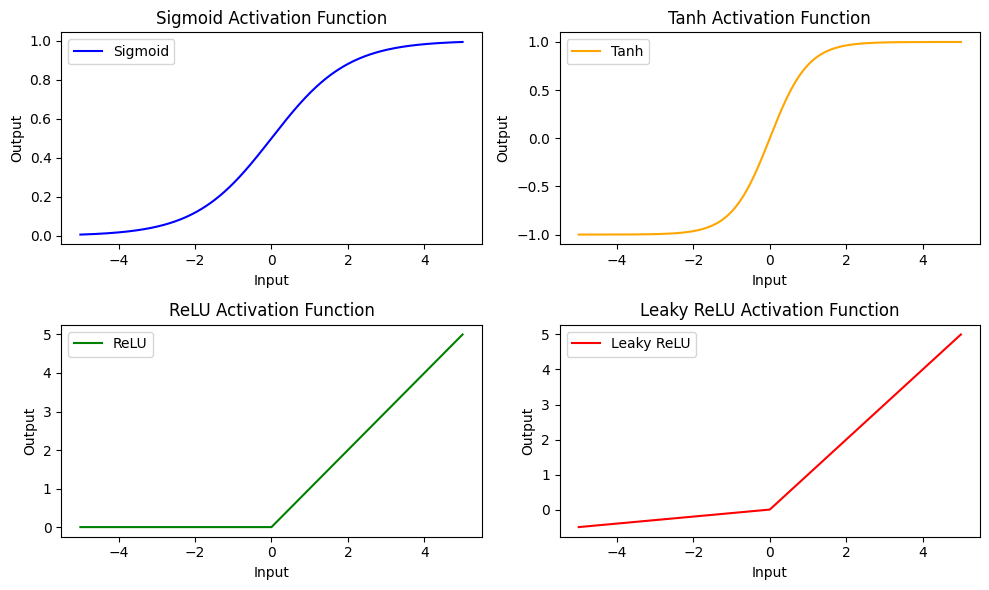

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define input values
x = np.linspace(-5, 5, 1000)

# Sigmoid function
sigmoid = 1 / (1 + np.exp(-x))

# Tanh function
tanh = np.tanh(x)

# ReLU function
relu = np.maximum(0, x)

# Leaky ReLU function
leaky_relu = np.maximum(0.1*x, x)



# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.plot(x, sigmoid, label='Sigmoid', color='blue')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, tanh, label='Tanh', color='orange')
plt.title('Tanh Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, relu, label='ReLU', color='green')
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, leaky_relu, label='Leaky ReLU', color='red')
plt.title('Leaky ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

plt.tight_layout()
plt.show()


# Effect of Activation Functions on Gradient Descent:


Activation functions play a crucial role in the gradient flow during backpropagation, which is a key aspect of training neural networks using gradient descent-based optimization algorithms. The choice of activation function can significantly impact the convergence and stability of the training process. Here's how activation functions affect gradient flow and how they address issues such as vanishing and exploding gradients:

1. **Vanishing Gradients:**
   - **Issue:** Vanishing gradients occur when the gradients of the loss function with respect to the network parameters become extremely small as they propagate backward through the layers. This can lead to slow or stalled learning, especially in deep networks.
   - **Causes:** Activation functions with limited gradients, such as the Sigmoid and Tanh functions, are prone to causing vanishing gradients, especially in deep networks with many layers.
   - **Solution:** Activation functions like ReLU, Leaky ReLU, ELU, and SELU have gradients that do not vanish for positive inputs, which helps mitigate the vanishing gradient problem. These functions allow for more effective gradient flow and learning in deep networks.

2. **Exploding Gradients:**
   - **Issue:** Exploding gradients occur when the gradients of the loss function become excessively large during backpropagation, causing unstable training and numerical issues.
   - **Causes:** Activation functions with unbounded gradients, such as the ReLU function, can contribute to exploding gradients, especially in networks with large weights or improper initialization.
   - **Solution:** Techniques like gradient clipping can help mitigate exploding gradients by capping the gradient values during backpropagation. Additionally, using activation functions with bounded gradients, such as Tanh or Sigmoid (although they are more prone to vanishing gradients), can also help control the gradient magnitudes and prevent them from exploding.

3. **Impact on Gradient Flow:**
   - **Smoothness:** Smooth activation functions with continuous derivatives, like Sigmoid, Tanh, and smooth variants of ReLU (e.g., ELU), can promote smoother gradient flow and more stable optimization.
   - **Non-linearity:** Non-linear activation functions, such as ReLU and its variants, introduce non-linearity into the network, enabling it to learn complex patterns and relationships in the data.
   - **Sparsity:** Activation functions like ReLU encourage sparsity in activations by setting negative values to zero, which can be beneficial in reducing computational complexity and overfitting.

In summary, different activation functions have varying impacts on gradient flow during backpropagation. Choosing an appropriate activation function involves balancing factors such as gradient behavior, non-linearity, smoothness, and computational efficiency based on the specific characteristics of the problem and the network architecture. Experimentation and tuning are often necessary to find the most suitable activation function for a given task.